<a href="https://colab.research.google.com/github/princeKike27/Zoo-Animal-Classification/blob/main/Zoo_Animal_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zoo Animal Classification

- Using NumPy I'm going to build a Neural Network that classifies animals from the Sao Paulo Zoo

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Zoo Data

- The Features that are going to be used in the model are the following:
  - *hair* ⟶ 1 if the animal has hair
  - *feathers* ⟶ 1 if the animal has feathers
  - *eggs* ⟶ 1 if the animal lays eggs
  - *milk* ⟶ 1 if the animal feeds milk to its offspring
  - *airborne* ⟶ 1 if the animal flies
  - *aquatic* ⟶ 1 if the animal lives in water
  - *predator* ⟶ 1 if the animal hunts other animals
  - *toothed* ⟶ 1 if the animal has teeth
  - *backbone* ⟶ 1 if the animal has bones
  - *breathes* ⟶ 1 if the animal breathes
  - *venomous* ⟶ 1 if the animal is poisonous
  - *fins* ⟶ 1 if the animal has fins
  - *legs* ⟶ number of legs
  - *tail* ⟶ 1 if the animal has a tail
  - *domestic* ⟶ 1 if it is a domestic animal
  - *catsize* ⟶ 1 if the animal size is bigger than a cat



In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set()

In [2]:
# load dataset
zoo_df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Zoo-Animal-Classification/main/zoo.csv', sep=';')

zoo_df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
210,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
211,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
212,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [3]:
# standarize legs >> between 0 and 1
zoo_df['legs'] = (zoo_df.legs - np.min(zoo_df.legs)) / (np.max(zoo_df.legs) - np.min(zoo_df.legs))

zoo_df.iloc[:, 1:]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,0.50,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0.00,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,0.50,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,1,0,1,0,1,0,0,1,1,0,0.75,0,0,0,6
210,0,0,1,0,0,0,0,0,0,1,0,0,0.75,0,0,0,7
211,0,0,1,0,0,0,0,0,0,1,0,0,0.00,0,0,0,7
212,1,0,1,0,0,0,1,0,0,1,1,0,1.00,0,0,0,7


In [4]:
# create zoo array
zoo_array = np.array(zoo_df.iloc[:, 1:])

# check shape
print(f'Zoo array Shape: {zoo_array.shape}', '\n')

zoo_array

Zoo array Shape: (214, 17) 



array([[1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 0., 4.],
       ...,
       [0., 0., 1., ..., 0., 0., 7.],
       [1., 0., 1., ..., 0., 0., 7.],
       [1., 0., 1., ..., 0., 0., 7.]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Train Test Split

- We are going to Shuffle Randomly the Zoo array and we are going to split it in the following way:

  - Train ⟶ 70% of data ⟶ 150 examples
  - Test ⟶ 30% of data ⟶ 64 examples

In [5]:
# shuffle randomly
np.random.shuffle(zoo_array)

zoo_array

array([[0., 0., 1., ..., 0., 1., 4.],
       [0., 1., 1., ..., 0., 0., 2.],
       [0., 1., 1., ..., 0., 0., 2.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 4.],
       [1., 0., 0., ..., 0., 1., 1.]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $X$ Inputs

In [6]:
# X inputs array
X = zoo_array[:, 0:16]

# check shape
print(f'X Shape: {X.shape}', '\n')

X

X Shape: (214, 16) 



array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [7]:
# X_train >> 70% of data
X_train = X[:150, :]

# check shape
print(f'X_train Shape: {X_train.shape}', '\n')

X_train

X_train Shape: (150, 16) 



array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [8]:
# X_test >> 30% of data
X_test =  X[150: , :]

# check shape
print(f'X_test Shape: {X_test.shape}', '\n')

X_test

X_test Shape: (64, 16) 



array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $X$ Transpose

- Inputs $X$ need to be Transposed so they can be fed to the Neural Network

In [9]:
# X_train Transpose
X_train_T = X_train.T 

# check shape
print(f'X_train Transpose Shape: {X_train_T.shape}', '\n')

X_train_T

X_train Transpose Shape: (16, 150) 



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [10]:
# X_test Transpose
X_test_T = X_test.T

# check shape
print(f'X_test Transpose Shape: {X_test_T.shape}', '\n')

X_test_T

X_test Transpose Shape: (16, 64) 



array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $Y$ Labels

- The Labels in which each animal is classified are the following:

  - $1 ⟶$ Mammal
  - $2 ⟶$ Bird
  - $3 ⟶$ Reptile
  - $4 ⟶$ Fish
  - $5 ⟶$ Amphibian
  - $6 ⟶$ Bug
  - $7 ⟶$ Invertebrate

In [11]:
# Y labels array
Y = zoo_array[:, -1].astype(int)

# check shape
print(f'Y Shape: {Y.shape}', '\n')

Y

Y Shape: (214,) 



array([4, 2, 2, 1, 7, 6, 7, 6, 3, 4, 1, 2, 6, 4, 2, 5, 3, 6, 1, 1, 4, 1,
       6, 2, 4, 1, 3, 3, 1, 2, 6, 2, 1, 4, 2, 6, 2, 3, 1, 4, 7, 2, 3, 4,
       7, 3, 2, 5, 1, 4, 2, 1, 3, 3, 1, 5, 4, 3, 5, 3, 7, 2, 7, 5, 5, 3,
       5, 3, 2, 5, 1, 4, 7, 7, 3, 2, 2, 2, 2, 4, 1, 1, 1, 7, 3, 4, 1, 5,
       1, 1, 1, 2, 1, 4, 6, 4, 1, 6, 6, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3, 5,
       4, 4, 6, 5, 1, 4, 7, 1, 1, 2, 1, 4, 2, 6, 5, 2, 1, 7, 7, 2, 1, 5,
       3, 6, 2, 1, 4, 6, 7, 1, 1, 2, 1, 1, 1, 1, 6, 5, 1, 6, 4, 7, 2, 3,
       1, 4, 6, 1, 7, 7, 6, 1, 5, 2, 2, 4, 1, 3, 4, 6, 2, 7, 1, 3, 1, 6,
       1, 6, 6, 2, 3, 3, 1, 6, 2, 4, 4, 2, 1, 1, 2, 1, 4, 2, 3, 7, 7, 1,
       6, 6, 5, 1, 2, 2, 2, 7, 1, 1, 1, 3, 2, 1, 4, 1])

In [12]:
# Y_train >> 70% of data
Y_train = Y[:150]

# check shape
print(f'Y_train Shape: {Y_train.shape}', '\n')

Y_train

Y_train Shape: (150,) 



array([4, 2, 2, 1, 7, 6, 7, 6, 3, 4, 1, 2, 6, 4, 2, 5, 3, 6, 1, 1, 4, 1,
       6, 2, 4, 1, 3, 3, 1, 2, 6, 2, 1, 4, 2, 6, 2, 3, 1, 4, 7, 2, 3, 4,
       7, 3, 2, 5, 1, 4, 2, 1, 3, 3, 1, 5, 4, 3, 5, 3, 7, 2, 7, 5, 5, 3,
       5, 3, 2, 5, 1, 4, 7, 7, 3, 2, 2, 2, 2, 4, 1, 1, 1, 7, 3, 4, 1, 5,
       1, 1, 1, 2, 1, 4, 6, 4, 1, 6, 6, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3, 5,
       4, 4, 6, 5, 1, 4, 7, 1, 1, 2, 1, 4, 2, 6, 5, 2, 1, 7, 7, 2, 1, 5,
       3, 6, 2, 1, 4, 6, 7, 1, 1, 2, 1, 1, 1, 1, 6, 5, 1, 6])

In [13]:
# Y_test >> 30% of data
Y_test = Y[150:]

# check shape
print(f'Y_test Shape: {Y_test.shape}', '\n')

Y_test

Y_test Shape: (64,) 



array([4, 7, 2, 3, 1, 4, 6, 1, 7, 7, 6, 1, 5, 2, 2, 4, 1, 3, 4, 6, 2, 7,
       1, 3, 1, 6, 1, 6, 6, 2, 3, 3, 1, 6, 2, 4, 4, 2, 1, 1, 2, 1, 4, 2,
       3, 7, 7, 1, 6, 6, 5, 1, 2, 2, 2, 7, 1, 1, 1, 3, 2, 1, 4, 1])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### One Hot Encode $Y$

- We need to One Hot Encode $Y$ so it can be used in the Neural Network

  - For example if $y_i ⟶ 3$, Reptile, then:

    - $y = [0, 0, 1, 0, 0, 0, 0]$

In [14]:
# create zeros array of shape >> Y.size x 6
hot_array = np.zeros((Y_train.size, 7))

# check shape
print(f'hot_array Shape: {hot_array.shape}', '\n')

# check first 10 cols
hot_array[:10, :]

hot_array Shape: (150, 7) 



array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [15]:
# for each row >> place a 1 at position y - 1
hot_array[np.arange(Y_train.size), Y_train - 1] = 1

# check shape
print(f'hot_array Shape: {hot_array.shape}', '\n')

# check first 10 cols 
print(hot_array[:10, :], '\n')

# first 10 labels
print('First 10 labels:')
print(Y_train[:10])

hot_array Shape: (150, 7) 

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]] 

First 10 labels:
[4 2 2 1 7 6 7 6 3 4]


In [16]:
# create function to one hot encode Y
def one_hot_Y(y):

  # zeros array of shape >> y.size x 7
  y_hot_array = np.zeros((y.size, 7))
  # for each row >> place 1 at position y - 1
  y_hot_array[np.arange(y.size), y - 1] = 1

  return y_hot_array

In [17]:
# test function
y_hot_test = one_hot_Y(Y_train)

# check shape
print(f'y_hot_test Shape: {y_hot_test.shape}', '\n')

# check first 10 cols
y_hot_test[:10, :]

y_hot_test Shape: (150, 7) 



array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Neural Network Model

- Neural Network Architecture:

  <br>

  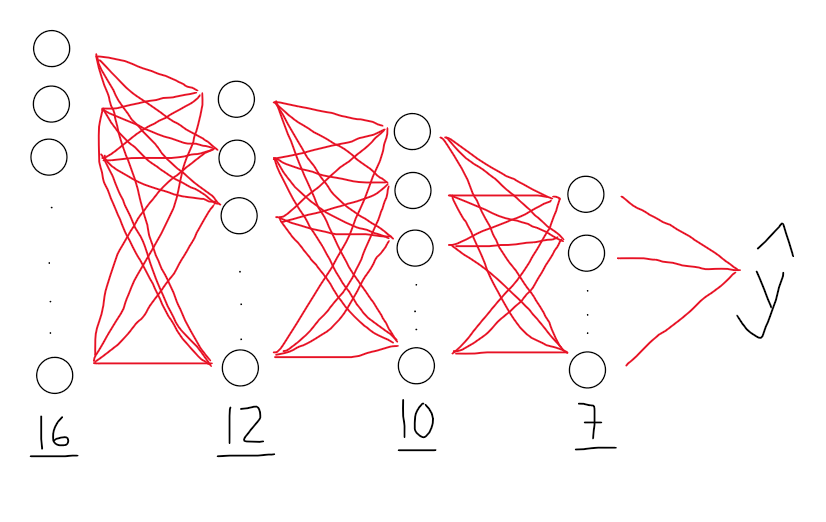

  <br>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Forward Propagation

- We Forward Propagate the Neural Network from Left to Right, with Random Values for $\vec{w}$ and $b$, to get the Model's Predictions

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### First Hidden Layer

<br>

- $A^{[0]} ⟶$ Inputs
  - $A^{[0]} ⟶ (16 \times m)$

<br>

- $\vec{w^{[1]}} ⟶$ Initialized Randomly
  - $\vec{w^{[1]}} ⟶ (12 \times 16)$

<br>

- $b^{[1]} ⟶$ Initialized Randomly
  - $b^{[1]} ⟶ (12 \times 1)$

<br>

$$ Z^{[1]}_{(12 \times 1)} =  \vec{w}^{[1]}_{(12 \times 16)} \times A^{[0]}_{(16 \times m)} + b^{[1]}_{(12 \times 1)}$$



In [18]:
# set random seed
random_state = np.random.RandomState(27)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\vec{w}^{[1]}$

In [23]:
# initialize W_1 with random values
W_1 = random_state.rand(12, 16) - 0.5

# check shape
print(f'W_1 Shape: {W_1.shape}', '\n')

# check first 5 cols
W_1[:, 0:5]

W_1 Shape: (12, 16) 



array([[ 0.08897386,  0.12739036, -0.31377291, -0.24168097, -0.37300282],
       [ 0.1085899 , -0.06262944, -0.03970719,  0.30246658, -0.42934957],
       [-0.37963134, -0.14394856, -0.01140697, -0.115783  , -0.3860572 ],
       [-0.47572065,  0.46846057, -0.33198899, -0.13813258,  0.19214788],
       [ 0.12485732, -0.12075192,  0.0823146 , -0.08177066, -0.06379741],
       [-0.23538387,  0.2459889 , -0.02233516,  0.33568512,  0.07572281],
       [-0.10648489,  0.10090082,  0.06664172,  0.43407596,  0.44700406],
       [ 0.08533142, -0.39180802, -0.08531564, -0.10443904,  0.47647091],
       [ 0.3413513 ,  0.37764856,  0.38513474,  0.4578241 ,  0.32199592],
       [ 0.42064909,  0.06394916,  0.17170506,  0.42909812,  0.02012511],
       [ 0.23623487, -0.02366497, -0.37418924,  0.07097365, -0.06996852],
       [ 0.41165613, -0.17641604,  0.08069667,  0.18934142, -0.30184017]])

<br>

- $b^{[1]}$

In [22]:
# initialize b_1 with random values
b_1 = random_state.rand(12, 1) - 0.5

# check shape
print(f'b Shape: {b.shape}', '\n')

b_1

b Shape: (12, 1) 



array([[ 0.15132626],
       [ 0.4369486 ],
       [-0.09350399],
       [-0.09856538],
       [ 0.37307308],
       [-0.4808551 ],
       [ 0.35938553],
       [ 0.31219428],
       [-0.18909547],
       [ 0.09961981],
       [-0.16938909],
       [-0.44086588]])

<br>

- $Z^{[1]}$

In [25]:
# calculate Z_1
Z_1 = np.dot(W_1, X_train_T) + b_1

# check shape
print(f'Z_1 Shape: {Z_1.shape}', '\n')

# check first 5 cols
Z_1[:, 0:5]

Z_1 Shape: (12, 150) 



array([[-0.46213032, -0.07090058, -0.24815564,  0.29851996, -0.0374397 ],
       [ 0.17997328, -0.18968826, -0.2301939 ,  0.02495223, -0.06896899],
       [-0.85786823, -0.52133237, -0.13715408, -0.32255329, -0.31386957],
       [-1.12690072,  0.35199233,  0.08265542, -1.19481405, -0.01225663],
       [ 0.00556418, -1.08034797, -1.0246627 , -0.63602891, -0.16994583],
       [-0.61071968,  0.28312303, -0.10527544,  0.40456415, -0.41795023],
       [ 0.61865462,  0.96216574,  0.78677341,  0.56706058,  0.71702169],
       [-0.01020995,  0.24782611, -0.07659832,  0.77595604, -0.69989255],
       [-0.3514765 ,  1.00733095,  0.55011305,  0.24244492,  0.68542498],
       [-0.28867225, -0.70257428,  0.22380494,  0.7461782 ,  0.45076838],
       [-1.35163004, -1.01704688, -0.41792045,  0.32170663, -0.75652618],
       [ 0.11298829, -0.80343348, -0.9014425 , -0.01457354, -0.66232663]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Activation Function of Layer 1

- We need to apply an Activation Function to each Layer, else each Node will just be a Linear Combination of the previuos Layer

  - We are going to use **ReLU** *(Rectified Linear Unit)* as an Activation Function
    
  <br>

  - $ReLU(Z) = max(0, Z)$
    - ReLU is a NONLINEAR Function for inputs less than 0
    - ReLU is a Linear Function for inputs greater than 0

  <br>

  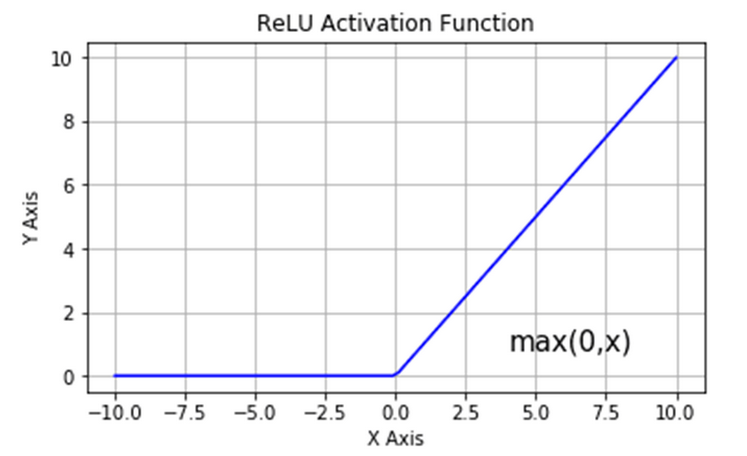

  <br>


In [26]:
# A_1 >> ReLU(Z_1)
A_1 = np.maximum(0, Z_1)

# check shape
print(f'A_1 Shape: {A_1.shape}', '\n')

# check first 5 cols
A_1[:, 0:5]

A_1 Shape: (12, 150) 



array([[0.        , 0.        , 0.        , 0.29851996, 0.        ],
       [0.17997328, 0.        , 0.        , 0.02495223, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35199233, 0.08265542, 0.        , 0.        ],
       [0.00556418, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.28312303, 0.        , 0.40456415, 0.        ],
       [0.61865462, 0.96216574, 0.78677341, 0.56706058, 0.71702169],
       [0.        , 0.24782611, 0.        , 0.77595604, 0.        ],
       [0.        , 1.00733095, 0.55011305, 0.24244492, 0.68542498],
       [0.        , 0.        , 0.22380494, 0.7461782 , 0.45076838],
       [0.        , 0.        , 0.        , 0.32170663, 0.        ],
       [0.11298829, 0.        , 0.        , 0.        , 0.        ]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Second Hidden Layer

<br>

- $A^{[1]} ⟶$ Inputs of Layer 1
  - $A^{[1]} ⟶ (12 \times m)$

<br>

- $\vec{w}^{[2]} ⟶$ Initialized Randomly
  - $\vec{w}^{[2]} ⟶ (10 \times 12)$

<br>

- $b^{[2]} ⟶$ Initialized Randomly
  - $b^{[2]} \longrightarrow (10 \times 1)$

<br>

 $$ Z^{[2]}_{(10 \times m)} = \vec{w}^{[2]}_{(10 \times 12)} \times A^{[1]}_{(12 \times m)} + b^{[2]}_{(10 \times 1)}$$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\vec{w}^{[2]}$

In [27]:
# Initialize W_2 with random values
W_2 = random_state.rand(10, 12) - 0.5

# check shape
print(f'W_2 Shape: {W_2.shape}', '\n')

# check first 5 cols
W_2[:, 0:5]

W_2 Shape: (10, 12) 



array([[ 0.0175407 ,  0.3025109 , -0.17212676,  0.02121013, -0.2017141 ],
       [-0.20456141,  0.4750102 , -0.49485187, -0.44462565, -0.0868438 ],
       [-0.08315989, -0.37222339,  0.49245871, -0.43251419, -0.39495467],
       [-0.37939189,  0.45606937, -0.12503182,  0.0521694 ,  0.48902043],
       [-0.16992037, -0.42983264,  0.1390221 ,  0.17916406, -0.48272208],
       [-0.44789622, -0.26622725, -0.09131388,  0.38412723,  0.10133952],
       [ 0.3907374 ,  0.08476172, -0.34289013,  0.16936054,  0.46250159],
       [ 0.44706136, -0.23325705, -0.02517046, -0.12242504, -0.24324096],
       [-0.25904706,  0.16703052, -0.30324895,  0.3000657 , -0.13819479],
       [ 0.00268173, -0.28060251,  0.2330073 ,  0.29278405,  0.01353943]])

<br>

- $b^{[2]}$

In [28]:
# initialize b_2 with random values
b_2 = random_state.rand(10, 1) - 0.5

# check shape
print(f'b_2 Shape: {b_2.shape}', '\n')

b_2

b_2 Shape: (10, 1) 



array([[ 0.24469587],
       [ 0.0012298 ],
       [-0.23562615],
       [ 0.2950387 ],
       [-0.01343021],
       [-0.04227804],
       [ 0.11294082],
       [-0.04214795],
       [-0.19183708],
       [-0.3920135 ]])

<br>

- $Z^{[2]}$

In [29]:
# calculate Z_2
Z_2 = np.dot(W_2, A_1) + b_2

# check shape
print(f'Z_2 Shape: {Z_2.shape}', '\n')

# check first 5 cols
Z_2[:, 0:5]

Z_2 Shape: (10, 150) 



array([[-0.03547068, -0.12097226, -0.03660807, -0.32742231, -0.00769973],
       [ 0.30673725,  0.13564513,  0.25441937,  0.63178664,  0.36023966],
       [-0.48641136, -0.86790916, -0.6927635 , -0.4599529 , -0.68050403],
       [ 0.28308826,  0.07486416,  0.10691305,  0.24193146,  0.08380829],
       [-0.43245239, -0.36462599, -0.27136053, -0.79381962, -0.26268538],
       [-0.10142867, -0.26828435, -0.03322724, -0.28500591,  0.03070999],
       [ 0.170234  ,  0.0306406 ,  0.02349034,  0.20903693, -0.00593882],
       [-0.38299166, -0.53167397, -0.49915406, -0.35060509, -0.53263818],
       [ 0.0166286 , -0.12774925,  0.02956844, -0.47663471, -0.01970229],
       [-0.35358007, -0.53512409, -0.49071066, -0.45916626, -0.55785952]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Activation Function of Layer 2

- $ReLU(Z^{[2]}) = max(0, Z^{[2]})$

In [30]:
# calculate A_2 >> ReLU(Z_2)
A_2 = np.maximum(0, Z_2)

# check shape
print(f'A_2 Shape: {A_2.shape}', '\n')

# check first 5 cols
A_2[:, 0:5]

A_2 Shape: (10, 150) 



array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.30673725, 0.13564513, 0.25441937, 0.63178664, 0.36023966],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.28308826, 0.07486416, 0.10691305, 0.24193146, 0.08380829],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.03070999],
       [0.170234  , 0.0306406 , 0.02349034, 0.20903693, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0166286 , 0.        , 0.02956844, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Third Hidden Layer

<br>

- $A^{[2]} ⟶$ Inputs of Layer 2
  - $A^{[2]} ⟶ (10 \times m)$

<br>

- $\vec{w}^{[3]} ⟶$ Intialized Randomly
  - $\vec{w}^{[3]} ⟶ (7 \times 10)$

<br>

- $b^{[3]} ⟶$ Initialized Randomly
  - $b^{[3]} ⟶ (7 \times 1)$

<br>

 $$ Z^{[3]}_{(7 \times m)} = \vec{w}^{[3]}_{(7 \times 10)} \times A^{[2]}_{(10 \times m)} + b^{[3]}_{(7 \times 1)} $$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\vec{w}^{[3]}$

In [31]:
# initialize W_3 with random values
W_3 = random_state.rand(7, 10) - 0.5

# check shape
print(f'W_3 Shape: {W_3.shape}', '\n')

# check first 5 cols
W_3[:, 0:5]

W_3 Shape: (7, 10) 



array([[ 0.20569277,  0.03852521, -0.25052498,  0.17068235,  0.09729264],
       [-0.1000652 ,  0.31224038, -0.08982678, -0.26041822, -0.07858881],
       [-0.14543692,  0.39774509, -0.26129527, -0.16488817,  0.3675813 ],
       [-0.43105261,  0.13321287,  0.07739329, -0.24691222, -0.00713662],
       [ 0.09210379,  0.18011755, -0.40902091,  0.42972956,  0.41054156],
       [ 0.12688477,  0.40163175,  0.01634628,  0.22019698, -0.03402387],
       [ 0.13959024, -0.07313264, -0.40262317,  0.35303578, -0.00149238]])

<br>

- $b^{[3]}$

In [34]:
# initialize b_3 with random values
b_3 = random_state.rand(7, 1) - 0.5

# check shape
print(f'b_3 Shape: {b_3.shape}', '\n')

b_3

b_3 Shape: (7, 1) 



array([[ 0.00636298],
       [ 0.06791037],
       [-0.10609158],
       [-0.20050534],
       [-0.12397765],
       [ 0.40959026],
       [ 0.03467135]])

In [35]:
# calculate Z_3
Z_3 = np.dot(W_3, A_2) + b_3

# check shape
print(f'Z_3 Shape: {Z_3.shape}', '\n')

# check first 5 cols
Z_3[:, 0:5]

Z_3 Shape: (7, 150) 



array([[ 0.04203715,  0.02124793,  0.01933697,  0.05071899,  0.04898713],
       [ 0.05989681,  0.08403761,  0.12737587,  0.15625828,  0.15927313],
       [-0.03068414, -0.0642118 , -0.02485717,  0.10716122,  0.03025172],
       [-0.29927099, -0.21222666, -0.21397378, -0.25321193, -0.16332164],
       [ 0.08272414, -0.06051935, -0.04168181,  0.14054885, -0.03726014],
       [ 0.65598467,  0.4900794 ,  0.5567451 ,  0.78158927,  0.55905497],
       [ 0.11269121,  0.05227593,  0.04474198,  0.08134751,  0.05027466]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Activation Function of Layer 3

- We are going to use the SOFTMAX Function in Layer 3

  - SoftMax is going to give us the probabilities of the animals being classified in each of the seven classes $[1, 2, 3, 4, 5, 6, 7]$

    - The HIGHEST Probability will determine the class in which the animal is classified

  <br>

  $$ SoftMax(z) = \frac{e^{z_i}}{\sum e^{z}}  $$

In [36]:
# create SoftMax function
def SoftMax(z):
  exp = np.exp(z)
  return exp / np.sum(exp)


In [38]:
# A_3 >> SoftMax(Z_3)
A_3 = SoftMax(Z_3)

# check shape
print(f'A_3 Shape: {A_3.shape}', '\n')

# check first 5 cols
A_3[:, 0:5]

A_3 Shape: (7, 150) 



array([[0.0008733 , 0.00085533, 0.0008537 , 0.00088091, 0.00087939],
       [0.00088903, 0.00091076, 0.0009511 , 0.00097897, 0.00098192],
       [0.00081204, 0.00078527, 0.00081679, 0.00093206, 0.00086307],
       [0.00062077, 0.00067723, 0.00067605, 0.00065004, 0.00071117],
       [0.00090956, 0.00078817, 0.00080316, 0.00096371, 0.00080672],
       [0.0016136 , 0.00136692, 0.00146116, 0.00182956, 0.00146454],
       [0.00093723, 0.00088229, 0.00087566, 0.00090831, 0.00088052]])

In [40]:
# check classification of the first 5 animals
predictions_raw = np.argmax(A_3, axis=0)

# add 1 to predictions since index starts at 0
predictions_raw += 1

# check first 10 predictions
print(f'First 10 animal Predictions: {predictions_raw[:10]}', '\n')

# check y labels
print(f'First 10 animal Labels: {Y_train[:10]}')

First 10 animal Predictions: [6 6 6 6 6 6 6 6 6 6] 

First 10 animal Labels: [4 2 2 1 7 6 7 6 3 4]


- Above can be seen the Prediction of the Model, after *Forward Propagating* the Neural Network with Random Values of $\vec{w}$ and $\vec{b}$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Forward Propagation Function

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)